## Fit A Few Models

In [4]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression #C is regularization param
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import discriminant_analysis
from sklearn import naive_bayes
from ticket_prediction_data import Ticket_PredictionData

tixO = Ticket_PredictionData()

X_train, X_test, y_train, y_test = tixO.get_data()

logistic = LogisticRegression(C=1e5) 

logistic.fit(X_train, y_train)
logistic_proba = logistic.predict_proba(X_train)
preds = logistic_proba[:,1]

Connection working!
Querying for main table
Got main table
Simplifying venues
Venues simplified
Simplifying events
Events simplified
Simplifying zones
Zones simplified
Querying for performers
Dummying performers
Performers dummied
Concatenating dummied performers
Performers concatanated
Starting final cleanup
Done


## Model Definition

In [3]:
def ModelScore(prob_pred, actuals, prob_cut, fn_penalty = 15):

    tn, fp, fn, tp = confusion_matrix(actuals, prob_pred > prob_cut).ravel()
    
    return fn_penalty*fn + 1*fp

## Logistic Custom Loss Scores

In [22]:
x = np.linspace(0,1,101)
y = np.zeros(101)
i = 0

for each in x:
    y[i] = ModelScore(preds, y_train, each)
    i = i+1

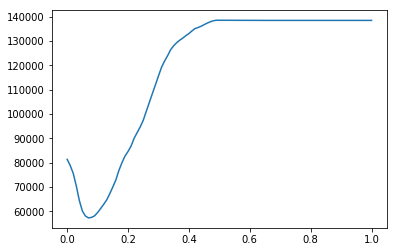

In [24]:
plt.plot(x, y)
plt.show()

## Random Forest Custom Loss Scores

In [25]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
rfc_proba = rfc.predict_proba(X_train)
rfc_preds = rfc_proba[:,1]

In [29]:
x_rfc = np.linspace(0,1,201)
y_rfc = np.zeros(201)
i = 0

for each in x_rfc:
    y_rfc[i] = ModelScore(rfc_preds, y_train, each)
    i = i+1

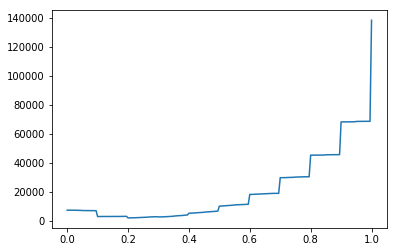

In [30]:
plt.plot(x_rfc, y_rfc)
plt.show()